# Capstone Project - The Battle of the Neighborhoods
### Applied Data Science Capstone by IBM/Coursera

## Business Problem section

#### Background

A major factor in the success of a restaurant is location and accessibility. Business can be driven by proximity to areas with a high volume of pedestrians, such as a thoroughfare, a movie theatre, or shopping center. Unless a restaurant has built up a local reputation or has extensive advertising, they can be dependent on walk-ins. A restaurant owner must not only pick the right location, but also appeal to the primary audience that they are serving. For example, if the restaurant is located near a suburban neighborhood, the owners should consider making it family oriented. Understanding the clientele is a crucial element of running a successful restaurant.

### Opening a Restaurant in Miami

![title](https://www.pods.com/-/media/pods/primary-feature/miami-skyline-1280x4221.jpg?mw=1280&hash=FD61C91A028095E839126C6B11E18F8D)

Miami is famous for its vacation spot. Its is also a multicultural place with lots of tourists and the busiest time is from mid-February through May. The goal of this analysis is to open a oriental cuisine restaurant in an ideal location where one can run successful business. We will go through each step of this project and address them separately. 

### Data section

The Data is collected from [Wikipedia](https://en.wikipedia.org/wiki/List_of_neighborhoods_in_Miami) by web scraping using Beautiful Soup library. The data includes Neighborhoods, Population, sub-neighborhoods, co-ordinates. To explore and target recommended locations across different venues according to the presence venues such as restaurents,gym,cafe etc. We will access data through FourSquare API interface and arrange them as a dataframe for visualization. By merging data on Miami neighborhoods and data on venues  from FourSquare API interface, we will be able to recommend Ideal Location.

### Target Audience
1. Business investors who wants to invest or open a restaurant.
2. Budding Entrepreneurs who want to open a profitable restaurant business. 

### Methodology section
The Methodology section will describe the main components of our analysis and Modelling system. 

1. Collect Inspection Data
2. Explore, Obtain and Understand Data using FourSquare API
3. Data Visualization and Some Simple Statistical Analysis 
4. Modeling Using Clustering, Specially K-Means Clustering.
5. Inference From these Results and related Conclusions.

### 1. Collect Inspection Data

After iimporting the libraries, we will scrape the data from wikipedia

In [411]:
# import the necessary Libraries 
import sys
import requests
import json

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors

# !conda install -c conda-forge geopy --yes
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

# !conda install -c conda-forge folium=0.5.0 --yes
import folium #import folium map rendering library

import io
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np

from sklearn.cluster import KMeans

print('libraries imported')

libraries imported


####  Web Scraping

In [412]:
source = requests.get("https://en.wikipedia.org/wiki/List_of_neighborhoods_in_Miami").text
soup = BeautifulSoup(source, 'lxml')

table = soup.find("table")
table_rows = table.tbody.find_all("tr")

In [413]:
res = []
for tr in table_rows:
    td = tr.find_all("td")
    row = [tr.text for tr in td]
    
    # Only process the cells that have an assigned borough. Ignore cells with a borough that is Not assigned.
    if row != [] and row[1] != "Not assigned":
        # If a cell has a borough but a "Not assigned" neighborhood, then the neighborhood will be the same as the borough.
        if "Not assigned" in row[2]: 
            row[2] = row[1]
        res.append(row)
df = pd.DataFrame(res, columns = ["Neighborhoods", "Demonym", "Total Population",'Population(per Km)','Sub-Neighborhoods','Co-ordinates'])
df.head()

,Neighborhoods,Demonym,Total Population,Population(per Km),Sub-Neighborhoods,Co-ordinates
0,Allapattah,,"54,289","4,401",,"25.815,-80.224\n"
1,Arts & Entertainment District,,"11,033","7,948",,"25.799,-80.190\n"
2,Brickell,Brickellite,"31,759","14,541",West Brickell,"25.758,-80.193\n"
3,Buena Vista,,"9,058","3,540",Buena Vista East Historic District and Design ...,"25.813,-80.192\n"
4,Coconut Grove,Grovite,"20,076","3,091","Center Grove, Northeast Coconut Grove, Southwe...","25.712,-80.257\n"


Cleaning the above data

In [414]:
df.drop([21,22,25],inplace=True)
df.drop(columns =['Demonym','Sub-Neighborhoods'],inplace=True)
df["Co-ordinates"] = df["Co-ordinates"].str.replace("\n","")

# new data frame with split value columns 
new = df["Co-ordinates"].str.split(",", n = 1, expand = True) 
  
# making separate first name column from new data frame 
df["Latitude"]= new[0] 
  
# making separate last name column from new data frame 
df["Longitude"]= new[1] 
  
# Dropping old Name columns 
df.drop(columns =["Co-ordinates"], inplace = True) 
  
# df display 
df.head()

,Neighborhoods,Total Population,Population(per Km),Latitude,Longitude
0,Allapattah,"54,289","4,401",25.815,-80.224
1,Arts & Entertainment District,"11,033","7,948",25.799,-80.190
2,Brickell,"31,759","14,541",25.758,-80.193
3,Buena Vista,"9,058","3,540",25.813,-80.192
4,Coconut Grove,"20,076","3,091",25.712,-80.257


Obtaining the latitude and longitudes using geopy library

In [418]:
address = '1350 NW 14th Street Miami, FL'

geolocator = Nominatim(user_agent="Miami_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Health District are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Health District are 25.7871033, -80.21776039891384.


In [421]:
#Insert the missing latitude, longitude of health district in to dataframe
df.at[11,'Latitude']=latitude
df.at[11,'Longitude']=longitude
df.head()

,Neighborhoods,Total Population,Population(per Km),Latitude,Longitude
0,Allapattah,"54,289","4,401",25.815,-80.224
1,Arts & Entertainment District,"11,033","7,948",25.799,-80.190
2,Brickell,"31,759","14,541",25.758,-80.193
3,Buena Vista,"9,058","3,540",25.813,-80.192
4,Coconut Grove,"20,076","3,091",25.712,-80.257


In [422]:
# get Miami Latitude and Longitude 
address = 'Miami'

geolocator = Nominatim(user_agent="Miami_explorer")
location = geolocator.geocode(address)
miami_latitude = location.latitude
miami_longitude = location.longitude
print('The geograpical coordinates of miami are {}, {}.'.format(miami_latitude, miami_longitude))

The geograpical coordinates of miami are 25.7742658, -80.1936589.


Lets plot the Neighborhoods of Miami using Folium Library

In [434]:
map_miami = folium.Map(location=[miami_latitude, miami_longitude], zoom_start=10)

# Add markers to map
for lat, lng, neighborhood in zip(df['Latitude'], df['Longitude'], df['Neighborhoods']):
    label = '{}'.format(neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=10,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_miami)  
    
map_miami

### 2. Explore, Obtain and Understand Data using FourSquare API

Now that we have our Neighborhood location, let's use Foursquare API to get venues in each neighborhood.

We're interested in venues in 'food' category, but only those that are proper restaurants - coffe shops, pizza places, bakeries etc. are not direct competitors so we don't care about those. So we will include in out list only venues that have 'restaurant' in category name, and we'll make sure to detect and include all the subcategories of specific 'Italian restaurant' category.

Foursquare credentials are defined in hidden cell bellow.


In [435]:
CLIENT_ID = 'A2OFYYDNGKJ0SSM1Q4HU4QUNX3CIJ3ZHCEBA4110CBTEYQMS'
CLIENT_SECRET = 'YM5UGRHV5VXHMIK4QA3MDRUWK2K3WRHHC1WROSFG51ENSCR4'
VERSION = '20200408'
LIMIT = 100
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: A2OFYYDNGKJ0SSM1Q4HU4QUNX3CIJ3ZHCEBA4110CBTEYQMS
CLIENT_SECRET:YM5UGRHV5VXHMIK4QA3MDRUWK2K3WRHHC1WROSFG51ENSCR4


### Explore Neighborhood venues 
I have defined a function that interacts with foursquare API and obtain venues for each and every neighborhood with in 500 meters of distance. I have limited the total venues to 100.

In [436]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [437]:
miami_venues = getNearbyVenues(names=df.Neighborhoods, latitudes=df.Latitude,
                    longitudes=df.Longitude)
print ("Shape of the Venues Dataframe: ", miami_venues.shape)
miami_venues.head()

Allapattah
Arts & Entertainment District
Brickell
Buena Vista
Coconut Grove
Coral Way
Design District
Downtown
Edgewater
Flagami
Grapeland Heights
Health District
Liberty City
Little Haiti
Little Havana
Lummus Park
Midtown
Overtown
Park West
The Roads
Upper Eastside
West Flagler
Wynwood
Shape of the Venues Dataframe:  (514, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Allapattah,25.815,-80.224,Three Fingers Liquor & Lounge,25.815408,-80.224361,Lounge
1,Allapattah,25.815,-80.224,Ross,25.815820,-80.221753,Department Store
2,Arts & Entertainment District,25.799,-80.190,Bunnie Cakes,25.799544,-80.190953,Cupcake Shop
3,Arts & Entertainment District,25.799,-80.190,Bunbury Miami,25.798284,-80.191118,Wine Shop
4,Arts & Entertainment District,25.799,-80.190,Plant Food + Wine Miami,25.800452,-80.192805,Restaurant


In [438]:
# save our results to a file
miami_venues.to_csv("miami_venues_500m.csv")

In [439]:
# Let's check how many venues were returned for each neighborhood.

miami_venues.groupby('Neighborhood').count().sort_values('Venue', ascending=False)

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Wynwood,82,82,82,82,82,82
Downtown,62,62,62,62,62,62
Brickell,57,57,57,57,57,57
Edgewater,48,48,48,48,48,48
Midtown,45,45,45,45,45,45
Buena Vista,32,32,32,32,32,32
Design District,31,31,31,31,31,31
Park West,26,26,26,26,26,26
Little Haiti,26,26,26,26,26,26


In [440]:
# Let's find out how many unique categories can be curated from all the returned venues
print('There are {} uniques categories.'.format(len(miami_venues['Venue Category'].unique())))

There are 147 uniques categories.


In [441]:
# Create a Dataframe out of it to Concentrate Only on Restaurants 

miami_Venues_only_restaurant = miami_venues[miami_venues['Venue Category'].str.contains('Restaurant')].reset_index(drop=True)
miami_Venues_only_restaurant.index = np.arange(1, len(miami_Venues_only_restaurant)+1)
print ("Shape of the Data-Frame with Venue Category only Restaurant: ", miami_Venues_only_restaurant.shape)
miami_Venues_only_restaurant.head()

Shape of the Data-Frame with Venue Category only Restaurant:  (156, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
1,Arts & Entertainment District,25.799,-80.190,Plant Food + Wine Miami,25.800452,-80.192805,Restaurant
2,Arts & Entertainment District,25.799,-80.190,Latin Cafe 2000,25.801025,-80.188909,Cuban Restaurant
3,Arts & Entertainment District,25.799,-80.190,Rincon Escondido Cafe,25.802719,-80.189102,Tapas Restaurant
4,Arts & Entertainment District,25.799,-80.190,NOA Catering,25.803114,-80.190942,Restaurant
5,Arts & Entertainment District,25.799,-80.190,La Palapa Hondureña,25.802788,-80.188872,Restaurant


Lets plot all the restaurants on the map:

In [448]:
miami_restaurants = folium.Map(location=[miami_latitude, miami_longitude], zoom_start=10)

# Add markers to map
for lat, lng, venue, neighborhood in zip(miami_Venues_only_restaurant['Venue Latitude'], miami_Venues_only_restaurant['Venue Longitude'], miami_Venues_only_restaurant['Venue'],miami_Venues_only_restaurant['Neighborhood']):
    label = '{}'.format(neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=7,
        popup=label,
        color='red',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(miami_restaurants)  
    
miami_restaurants

As we can observe, Most of the restaurants are close to the beaches. This make sense as beaches attracts people across the land.

#### Total number of restaurants among neighborhoods :

In [452]:
miami_Venues_only_restaurant.groupby('Neighborhood').count().sort_values('Venue Category', ascending=False)

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Downtown,25,25,25,25,25,25
Wynwood,22,22,22,22,22,22
Brickell,21,21,21,21,21,21
Midtown,17,17,17,17,17,17
Edgewater,15,15,15,15,15,15
Buena Vista,7,7,7,7,7,7
Design District,7,7,7,7,7,7
Little Haiti,7,7,7,7,7,7
Lummus Park,6,6,6,6,6,6


### 3. Data Visualization and Some Simple Statistical Analysis 
 Create a Data-frame with the 10 Most Frequently Occuring Venue_Category

In [469]:
# create a dataframe of top 10 categories
miami_Venues_Top10 = miami_venues['Venue Category'].value_counts()[0:10].to_frame(name='frequency')
miami_Venues_Top10=miami_Venues_Top10.reset_index()

miami_Venues_Top10.rename(index=str, columns={"index": "Venue Category", "frequency": "Frequency"}, inplace=True)

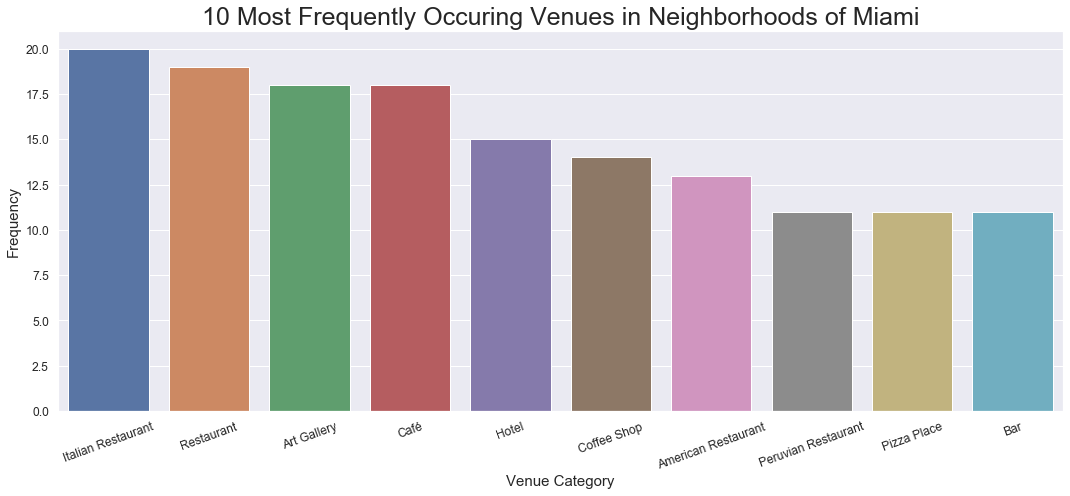

In [472]:
import seaborn as sns
fig = plt.figure(figsize=(18,7))
s=sns.barplot(x="Venue Category", y="Frequency", data=miami_Venues_Top10)
s.set_xticklabels(s.get_xticklabels(), rotation=20)
plt.title('10 Most Frequently Occuring Venues in Neighborhoods of Miami', fontsize=25)
plt.xlabel("Venue Category", fontsize=15)
plt.ylabel ("Frequency", fontsize=15)
plt.savefig("Most Frequent Venues.png", dpi=300)
plt.show()

Now its a proven fact that Restaurants are most frequently visited venues and Italian restaurants are the number 1 most visited venue according to the data. Let's analyze the total number of italian restaurants among neighborhoods.

#### Total no. of Restaurants among neighborhhoods from all venues: 

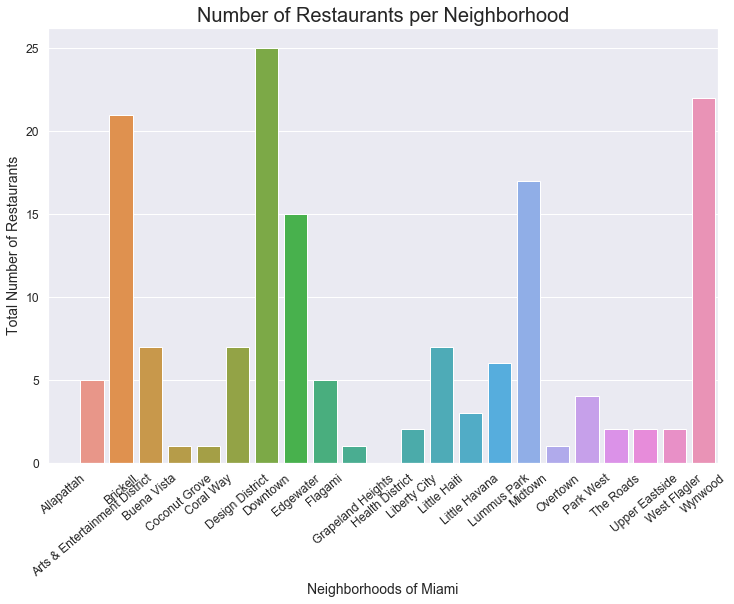

In [480]:
# visualize number of restaurants by venue using group_by

miami_Venues_restaurant = miami_venues.groupby(['Neighborhood'])['Venue Category'].apply(lambda x: x[x.str.contains('Restaurant')].count())
miami_Venues_restaurant_df = miami_Venues_restaurant.to_frame().reset_index()
miami_Venues_restaurant_df.columns = ['Neighborhood', 'Number of Restaurant']
miami_Venues_restaurant_df.index = np.arange(1, len(miami_Venues_restaurant_df)+1)

list_rest_no = miami_Venues_restaurant_df['Number of Restaurant'].to_list()
#print (list_rest_no)
fig = plt.figure(figsize=(12,8))
bar = sns.barplot(x='Neighborhood', y='Number of Restaurant', data=miami_Venues_restaurant_df)

bar.set_ylabel("Total Number of Restaurants", fontsize=14)
bar.set_xlabel("Neighborhoods of Miami", fontsize=14)
bar.set_xticklabels(bar.get_xticklabels(),rotation=40)
bar.set_title("Number of Restaurants per Neighborhood", fontsize=20)
#plt.savefig("No_of_Rest_as_Top_Venues.png", dpi=240)
plt.show()

If one has decided to Open a restaurant, Above plot could be useful in choosing the proximity location.  

### Total number of Italian restaurants among neighborhoods:

In [478]:
#filtering italian restaurents among neighborhoods 
plot_1 = miami_Venues_only_restaurant[miami_Venues_only_restaurant['Venue Category'].str.contains('Italian')].reset_index(drop=True)

#creating a dataframe with total number of italian restaurants in neighborhoods
plot_1a = plot_1['Neighborhood'].value_counts().to_frame(name='frequency')
plot_1a=plot_1a.reset_index()

#Renaming the column names
plot_1a.rename(index=str, columns={"index": "Neighborhood", "frequency": "No. of Italian Restarants"}, inplace=True)

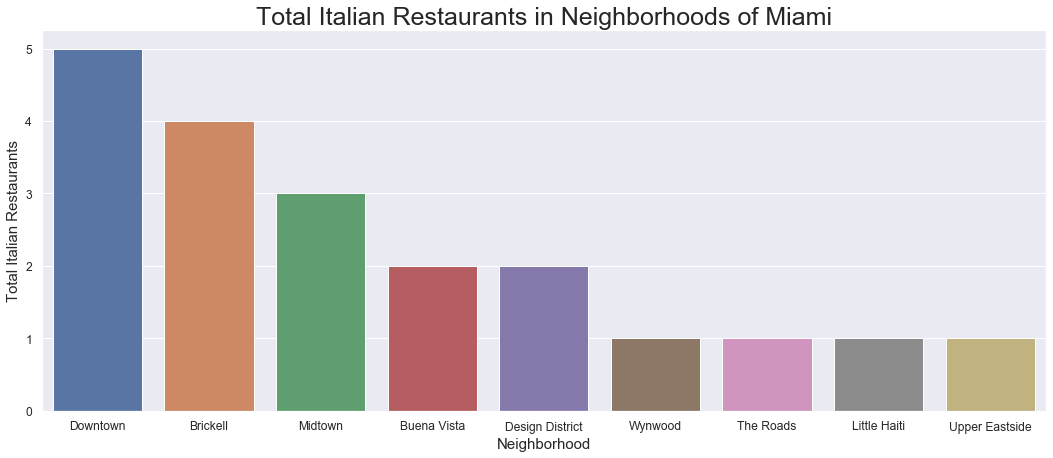

In [479]:
# Visualing through bar graphs

fig = plt.figure(figsize=(18,7))
s=sns.barplot(x="Neighborhood", y="No. of Italian Restarants", data=plot_1a)

s.set_xticklabels(s.get_xticklabels(), rotation=0)
plt.title('Total Italian Restaurants in Neighborhoods of Miami', fontsize=25)
plt.xlabel("Neighborhood", fontsize=15)
plt.ylabel ("Total Italian Restaurants", fontsize=15)
plt.savefig("Total talian Restaurants per venue.png", dpi=300)
plt.show()

As we can infer, Downtown has most number of italian restaurants with a total of 5 followed by brickwell and midtown.

#### One Hot coding is useful in finding top 10 most commonly visited venues for each neighborhood.

In [481]:
### Use One Hot Encoding to Get More Information about the Venue Categories 
miami_Venues_onehot = pd.get_dummies(miami_venues[['Venue Category']], prefix="", prefix_sep="")

### Add Neighborhoods column back to dataframe
miami_Venues_onehot['Neighborhood'] = miami_venues['Neighborhood'] 
### Move Neighborhood column to the first column
fixed_columns = [miami_Venues_onehot.columns[-1]] + list(miami_Venues_onehot.columns[:-1])
miami_Venues_onehot = miami_Venues_onehot[fixed_columns]

In [482]:
miami_Venues_Grouped = miami_Venues_onehot.groupby('Neighborhood').mean().reset_index()
miami_Venues_Grouped.index = np.arange(1, len(miami_Venues_Grouped)+1)
miami_Venues_Grouped

,Neighborhood,Yoga Studio,Accessories Store,American Restaurant,Aquarium,Arcade,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,...,Tennis Court,Theater,Thrift / Vintage Store,Vegetarian / Vegan Restaurant,Venezuelan Restaurant,Wine Bar,Wine Shop,Winery,Wings Joint,Women's Store
1,Allapattah,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000
2,Arts & Entertainment District,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.052632,0.000000,0.00,0.000000
3,Brickell,0.000000,0.000000,0.035088,0.000000,0.000000,0.000000,0.035088,0.000000,0.000000,...,0.000,0.000000,0.000000,0.000000,0.017544,0.000000,0.000000,0.000000,0.00,0.000000
4,Buena Vista,0.000000,0.000000,0.031250,0.000000,0.031250,0.031250,0.000000,0.031250,0.031250,...,0.000,0.000000,0.000000,0.000000,0.000000,0.031250,0.000000,0.000000,0.00,0.031250
5,Coconut Grove,0.000000,0.000000,0.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000
6,Coral Way,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000
7,Design District,0.000000,0.000000,0.032258,0.000000,0.032258,0.032258,0.000000,0.032258,0.032258,...,0.000,0.000000,0.000000,0.000000,0.000000,0.032258,0.000000,0.000000,0.00,0.032258
8,Downtown,0.000000,0.000000,0.032258,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000,0.016129,0.000000,0.000000,0.000000,0.016129,0.000000,0.000000,0.00,0.000000
9,Edgewater,0.020833,0.000000,0.020833,0.000000,0.000000,0.000000,0.000000,0.041667,0.000000,...,0.000,0.000000,0.020833,0.000000,0.000000,0.000000,0.020833,0.020833,0.00,0.000000
10,Flagami,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000


In [483]:
for places in miami_Venues_Grouped['Neighborhood']:
    print("*********"+places+"*********")
    temp = miami_Venues_Grouped[miami_Venues_Grouped['Neighborhood'] == places].T.reset_index()
    temp.columns = ['Venue','Frequency']
    temp = temp.iloc[1:]
    temp['Frequency'] = temp['Frequency'].astype(float)
    temp = temp.round({'Frequency': 2})
    print(temp.sort_values('Frequency', ascending=False).reset_index(drop=True).head())
    print('\n')

*********Allapattah*********
                           Venue  Frequency
0               Department Store        0.5
1                         Lounge        0.5
2                    Yoga Studio        0.0
3  Paper / Office Supplies Store        0.0
4                  Moving Target        0.0


*********Arts & Entertainment District*********
            Venue  Frequency
0      Restaurant       0.16
1  Ice Cream Shop       0.11
2             Gym       0.11
3     Pizza Place       0.05
4    Cupcake Shop       0.05


*********Brickell*********
                 Venue  Frequency
0                Hotel       0.09
1   Italian Restaurant       0.07
2  Japanese Restaurant       0.05
3            Juice Bar       0.04
4                 Bank       0.04


*********Buena Vista*********
                Venue  Frequency
0                Café       0.09
1       Jewelry Store       0.06
2  Italian Restaurant       0.06
3      Clothing Store       0.06
4         Coffee Shop       0.06


*********Coconut G

### Now let's create a new dataframe and display 10 most common venues for each neighborhood.

In [500]:
## Define a Function to select the top 10 rows (According to the Values) 

def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

# Returns list of top 10 venues
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
miami_neighborhoods_sorted = pd.DataFrame(columns=columns)
miami_neighborhoods_sorted['Neighborhood'] = miami_Venues_Grouped['Neighborhood']

for ind in np.arange(miami_Venues_Grouped.shape[0]):
    miami_neighborhoods_sorted.iloc[ind, 1:] = return_most_common_venues(miami_Venues_Grouped.iloc[ind, :], num_top_venues)

    
miami_neighborhoods_sorted.index = np.arange(1, len(miami_neighborhoods_sorted)+1)
miami_neighborhoods_sorted


,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Allapattah,Department Store,Lounge,Women's Store,Eastern European Restaurant,Flea Market,Fish Market,Fast Food Restaurant,Event Space,Empanada Restaurant,Donut Shop
2,Arts & Entertainment District,Restaurant,Gym,Ice Cream Shop,Park,Tapas Restaurant,Salon / Barbershop,Cuban Restaurant,Smoothie Shop,Food Truck,Moving Target
3,Brickell,Hotel,Italian Restaurant,Japanese Restaurant,Harbor / Marina,Juice Bar,Sandwich Place,Bar,Bank,Restaurant,Salon / Barbershop
4,Buena Vista,Café,Boutique,Coffee Shop,Clothing Store,Jewelry Store,Italian Restaurant,Indian Restaurant,Mediterranean Restaurant,Pizza Place,Cocktail Bar
5,Coconut Grove,Boat or Ferry,American Restaurant,Park,Eastern European Restaurant,Food,Flea Market,Fish Market,Fast Food Restaurant,Event Space,Empanada Restaurant
6,Coral Way,Liquor Store,Historic Site,Café,Pharmacy,Mobile Phone Shop,Seafood Restaurant,Burger Joint,Golf Course,Dive Bar,Dog Run
7,Design District,Café,Boutique,Coffee Shop,Clothing Store,Jewelry Store,Italian Restaurant,Indian Restaurant,Mediterranean Restaurant,Pizza Place,Cocktail Bar
8,Downtown,Italian Restaurant,Peruvian Restaurant,Hotel,Cocktail Bar,Lounge,Cosmetics Shop,Brazilian Restaurant,Pharmacy,Coffee Shop,Sandwich Place
9,Edgewater,Restaurant,Sandwich Place,Breakfast Spot,Pizza Place,Peruvian Restaurant,Gym,Cuban Restaurant,Art Gallery,Martial Arts Dojo,New American Restaurant
10,Flagami,Seafood Restaurant,Peruvian Restaurant,Department Store,Fast Food Restaurant,Spanish Restaurant,Bakery,Women's Store,Eastern European Restaurant,Fish Market,Event Space


## 4. Modeling Using  K-Means Clustering.

Finding the optimal value of k before modelling using silhoutte

In [498]:
from sklearn.metrics import silhouette_score

miami_grouped_clustering = miami_Venues_Grouped.drop('Neighborhood', 1)
sil = []
kmax = 15

# dissimilarity would not be defined for a single cluster, thus, minimum number of clusters should be 2
for k in range(2, kmax+1):
  kmeans = KMeans(n_clusters = k).fit(miami_grouped_clustering)
  labels = kmeans.labels_
  sil.append(silhouette_score(miami_grouped_clustering, labels, metric = 'euclidean'))

sil

[0.29816592022856764,
 0.31443766971401155,
 0.2638595452638041,
 0.2757825332047923,
 0.24606758342000468,
 0.20433584023059218,
 0.19754501817814282,
 0.16670304365480537,
 0.061540562970160785,
 0.05497692083550228,
 0.11787262880502716,
 0.05021179896608412,
 0.12156146018781241,
 0.06825220400352448]

I have used silhouette method to choose the optimal value of k. The optimal value according to method is k = 3

In [501]:
# set number of clusters
kclusters = 3
# k-means clustering model
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(miami_grouped_clustering)

# check cluster labels generated for each row in the dataframe
print ("Check the 5 Cluster labels :",  kmeans.labels_[0:5])

Check the 5 Cluster labels : [2 1 1 1 0]


In [502]:
# Add clustering labels to dataset

miami_neighborhoods_sorted.insert(0, 'Cluster Label', kmeans.labels_)
miami_Coordinate_Cluster_merged = df

#merge the inital miami Dataframe with Sorted Most Visited places for each neighborhood

miami_Coordinate_Cluster_merged = miami_Coordinate_Cluster_merged.join(miami_neighborhoods_sorted.set_index('Neighborhood'), on='Neighborhoods')
miami_Coordinate_Cluster_merged[7:15]

,Neighborhoods,Total Population,Population(per Km),Latitude,Longitude,Cluster Label,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
7,Downtown,"71,000 (13,635 CBD only)","10,613",25.774,-80.193,1,Italian Restaurant,Peruvian Restaurant,Hotel,Cocktail Bar,Lounge,Cosmetics Shop,Brazilian Restaurant,Pharmacy,Coffee Shop,Sandwich Place
8,Edgewater,"15,005","6,675",25.802,-80.190,1,Restaurant,Sandwich Place,Breakfast Spot,Pizza Place,Peruvian Restaurant,Gym,Cuban Restaurant,Art Gallery,Martial Arts Dojo,New American Restaurant
9,Flagami,"50,834","5,665",25.762,-80.316,1,Seafood Restaurant,Peruvian Restaurant,Department Store,Fast Food Restaurant,Spanish Restaurant,Bakery,Women's Store,Eastern European Restaurant,Fish Market,Event Space
10,Grapeland Heights,"14,004","4,130",25.792,-80.258,1,Hotel Pool,Auto Garage,Gym / Fitness Center,Gym,Golf Course,Hotel Bar,Restaurant,Bar,Hotel,Art Museum
11,Health District,"2,705","2,148",25.7871,-80.2178,1,Beach,Bakery,Coffee Shop,Café,Women's Store,Event Space,Food,Flea Market,Fish Market,Fast Food Restaurant
12,Liberty City,"19,725","3,733",25.832,-80.225,1,Caribbean Restaurant,Southern / Soul Food Restaurant,Food,Department Store,Dessert Shop,Diner,Discount Store,Dive Bar,Dog Run,Food Truck
13,Little Haiti,"29,760","3,840",25.824,-80.191,1,Yoga Studio,Shopping Mall,Pub,Caribbean Restaurant,Clothing Store,Pizza Place,Pilates Studio,Pharmacy,Gym,Coffee Shop
14,Little Havana,"76,163","8,423",25.773,-80.215,1,Latin American Restaurant,Shoe Store,Pharmacy,Mexican Restaurant,Discount Store,Café,Grocery Store,Bakery,Fast Food Restaurant,Event Space


#### Representing most common venue by leaflet map in folium library

In [512]:
# create map
map_restaurants = folium.Map(location=[miami_latitude, miami_longitude], tiles='cartodbpositron', zoom_start = 10)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]
#rainbow = ['#00ff00', '#ff00ff','#0000ff','#ffa500' ,'#ff0000']
Locations = list(miami_Coordinate_Cluster_merged['Neighborhoods'])

# add markers to the map
for lat, lon, location, cluster in zip(miami_Coordinate_Cluster_merged['Latitude'], 
                                  miami_Coordinate_Cluster_merged['Longitude'], 
                                  miami_Coordinate_Cluster_merged['Neighborhoods'], 
                                  miami_Coordinate_Cluster_merged['Cluster Label']):
    label = folium.Popup(str(location) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=list_rest_no[Locations.index(location)]*0.5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_restaurants)
       
map_restaurants

Neighborhoods of Miami segmented into 3 clusters based on the most common venues. The size of the circles represents number of restaurants as most common venues for each neighborhood

#### Group by Cluster Labels:

In [504]:
miami_Coordinate_Cluster_merged.groupby("Cluster Label").count()

,Neighborhoods,Total Population,Population(per Km),Latitude,Longitude,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
Cluster Label,,,,,,,,,,,,,,,
0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
1,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21
2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


#### Plotting merged dataset on the map for better visual understanding:

In [513]:
# create map
map_clusters = folium.Map(location=[miami_latitude, miami_longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, location, cluster in zip(miami_Coordinate_Cluster_merged['Latitude'], 
                                  miami_Coordinate_Cluster_merged['Longitude'], 
                                  miami_Coordinate_Cluster_merged['Neighborhoods'], 
                                  miami_Coordinate_Cluster_merged['Cluster Label']):
    label = folium.Popup(str(location) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=8,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

### Cluster wise exploration

#### Cluster 1

In [506]:
Miami_Cluster1 = miami_Coordinate_Cluster_merged.loc[miami_Coordinate_Cluster_merged['Cluster Label'] == 0]
print ("No of Neighbourhood in Cluster Label 0: %d" %(Miami_Cluster1.shape[0]))
Miami_Cluster1

No of Neighbourhood in Cluster Label 0: 1


,Neighborhoods,Total Population,Population(per Km),Latitude,Longitude,Cluster Label,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
4,Coconut Grove,"20,076","3,091",25.712,-80.257,0,Boat or Ferry,American Restaurant,Park,Eastern European Restaurant,Food,Flea Market,Fish Market,Fast Food Restaurant,Event Space,Empanada Restaurant


#### Cluster 2

In [507]:
Miami_Cluster2 = miami_Coordinate_Cluster_merged.loc[miami_Coordinate_Cluster_merged['Cluster Label'] == 1]
print ("No of Neighbourhood in Cluster Label 0: %d" %(Miami_Cluster1.shape[0]))
Miami_Cluster2

No of Neighbourhood in Cluster Label 0: 1


,Neighborhoods,Total Population,Population(per Km),Latitude,Longitude,Cluster Label,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Arts & Entertainment District,"11,033","7,948",25.799,-80.190,1,Restaurant,Gym,Ice Cream Shop,Park,Tapas Restaurant,Salon / Barbershop,Cuban Restaurant,Smoothie Shop,Food Truck,Moving Target
2,Brickell,"31,759","14,541",25.758,-80.193,1,Hotel,Italian Restaurant,Japanese Restaurant,Harbor / Marina,Juice Bar,Sandwich Place,Bar,Bank,Restaurant,Salon / Barbershop
3,Buena Vista,"9,058","3,540",25.813,-80.192,1,Café,Boutique,Coffee Shop,Clothing Store,Jewelry Store,Italian Restaurant,Indian Restaurant,Mediterranean Restaurant,Pizza Place,Cocktail Bar
5,Coral Way,"35,062","4,496",25.750,-80.283,1,Liquor Store,Historic Site,Café,Pharmacy,Mobile Phone Shop,Seafood Restaurant,Burger Joint,Golf Course,Dive Bar,Dog Run
6,Design District,"3,573","3,623",25.813,-80.193,1,Café,Boutique,Coffee Shop,Clothing Store,Jewelry Store,Italian Restaurant,Indian Restaurant,Mediterranean Restaurant,Pizza Place,Cocktail Bar
7,Downtown,"71,000 (13,635 CBD only)","10,613",25.774,-80.193,1,Italian Restaurant,Peruvian Restaurant,Hotel,Cocktail Bar,Lounge,Cosmetics Shop,Brazilian Restaurant,Pharmacy,Coffee Shop,Sandwich Place
8,Edgewater,"15,005","6,675",25.802,-80.190,1,Restaurant,Sandwich Place,Breakfast Spot,Pizza Place,Peruvian Restaurant,Gym,Cuban Restaurant,Art Gallery,Martial Arts Dojo,New American Restaurant
9,Flagami,"50,834","5,665",25.762,-80.316,1,Seafood Restaurant,Peruvian Restaurant,Department Store,Fast Food Restaurant,Spanish Restaurant,Bakery,Women's Store,Eastern European Restaurant,Fish Market,Event Space
10,Grapeland Heights,"14,004","4,130",25.792,-80.258,1,Hotel Pool,Auto Garage,Gym / Fitness Center,Gym,Golf Course,Hotel Bar,Restaurant,Bar,Hotel,Art Museum
11,Health District,"2,705","2,148",25.7871,-80.2178,1,Beach,Bakery,Coffee Shop,Café,Women's Store,Event Space,Food,Flea Market,Fish Market,Fast Food Restaurant


#### Cluster 3

In [508]:
Miami_Cluster3 = miami_Coordinate_Cluster_merged.loc[miami_Coordinate_Cluster_merged['Cluster Label'] == 2]
print ("No of Neighbourhood in Cluster Label 0: %d" %(Miami_Cluster1.shape[0]))
Miami_Cluster3

No of Neighbourhood in Cluster Label 0: 1


,Neighborhoods,Total Population,Population(per Km),Latitude,Longitude,Cluster Label,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Allapattah,"54,289","4,401",25.815,-80.224,2,Department Store,Lounge,Women's Store,Eastern European Restaurant,Flea Market,Fish Market,Fast Food Restaurant,Event Space,Empanada Restaurant,Donut Shop


### 5. Inference From these Results and related Conclusions.

We have successfully analyzed the neighborhoods of Miami and, as we started our analysis with pros and cons of opening a continental restaurant like italian restaurant in one of the busiest neighborhoods, the data exploration was mostly targeted on restaurants. I have collected the data from web resources like Wikipedia, python libraries like Geopy, and Foursquare API, to set up a very realistic data-analysis scenario. We have found out that
 - continental cuisine restaurants top the charts of most common venues in the neighborhoods.
 - Downtown, Midtown and brickell neighborhoods are dominated by restaurants with italian restaurants being most coommon venue whereas overtown and wynwood are dominated by bars, theatre, and cafe as most common venues.
 - Downtown has maximum number of restaurants as the most common venue whereas has grapeheights area has the none.
 - Since the clustering was based only on the most common venues of each district, Allapatah fall under one  cluster and coconut grove fall under another cluster. since rest of the neighborhoods has most common venues, they fall under one cluster.

According to this analysis, Allapattah Neighborhood will provide least competition for an upcoming continental restaurant as stores & markets are the most common venue in this area and the frequency of restaurants as  the most common venue is very low compared to the remaining neighborhoods. The average Population per Km in Allapattah is denser compared to other neighborhoods and is close to beachs, downtown in miami. This Neighborhood could be a strategic location for continental restaurants. Few limitations and drawbacks of the analysis are

 - The Model we build is completely relied on the data provided by FourSquare API. In actuality, There will be many more features or factors to estimate an ideaal location for a restaurant.
 - This Assumptions we made is far from actuality. However, it certainly gives us some very important preliminary information on possibilities of opening restaurants around the neighborhoods of Miami.
 - The will be more conclusive evidence if more factors/features proovided.

#### CONCLUSIONS:

- We got a wonderful exposure of how real life data-science projects look like. 
- We have explored various methods and used libraries like Beautiful soup for web scraping and Foursquare API in obtaining neighborhoods of Miami and used Folium leaflet map to visualize neighborhoods. 
- We have drawn few potential results using the data for an ideal location in opening a restaurant. Explored the  areas of improvement. 